In [9]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


###  Посчитаем эмпирическую функцию распределения

In [19]:
def empirical(sample,n, x):
    array = []
    for count in x:
        s= 0
        i= 0
        while(i < n):
            if(sample[i] <= count):
                s= s + 1
            i= i + 1
        array.append(s*(n**(-1)))
    return array
        

### Функция для построения графиков (принимает на вход различные  𝑛 <= 𝑁 )

In [20]:
def build_empirical_plot(n,sample) :
    x = linspace(-6,6,1000)
    y = empirical(sample,n,x)
    plt.figure(figsize=(10,10))
    # эмпирическая функция распределения
    plt.step(x, y, color='red',linewidth=2.5, label = r'$F_n(x)$') 
    #истинная функция распределения:
    plt.plot(x, sps.norm.cdf(x, 0, 1), color = 'green',linewidth=2.5, 
             label = r'$F(x)$') 
    #точки “скачков” кривых
    plt.plot(sample[:n], sample[:n]*0, 'or', linewidth=2.5, alpha = 0.2) 
    plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    plt.title('$n=$'+str(n))
    plt.xlabel('x', fontsize = 15)
    plt.ylabel('y', fontsize = 15)
    plt.show()
    
        

## Графики

In [10]:
N = 10**4
sample = sps.norm.rvs(0, 1, size = N)

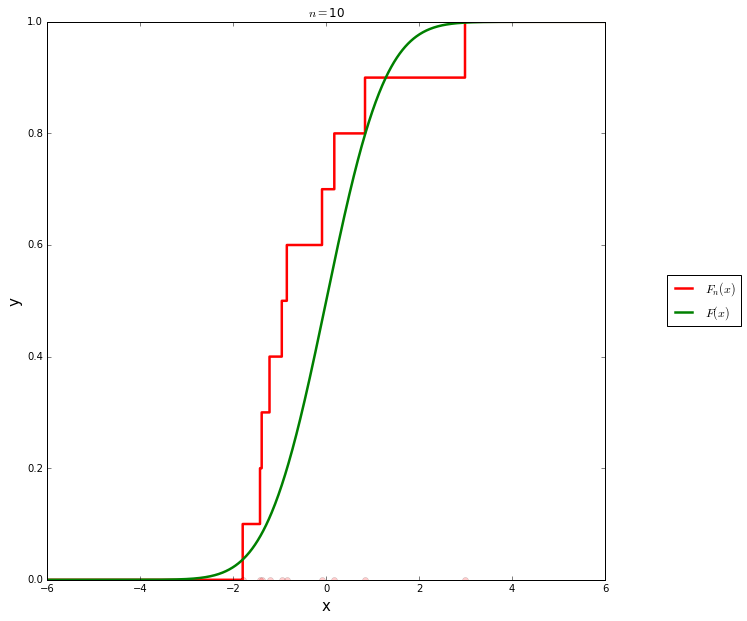

In [22]:
build_empirical_plot(10,sample)

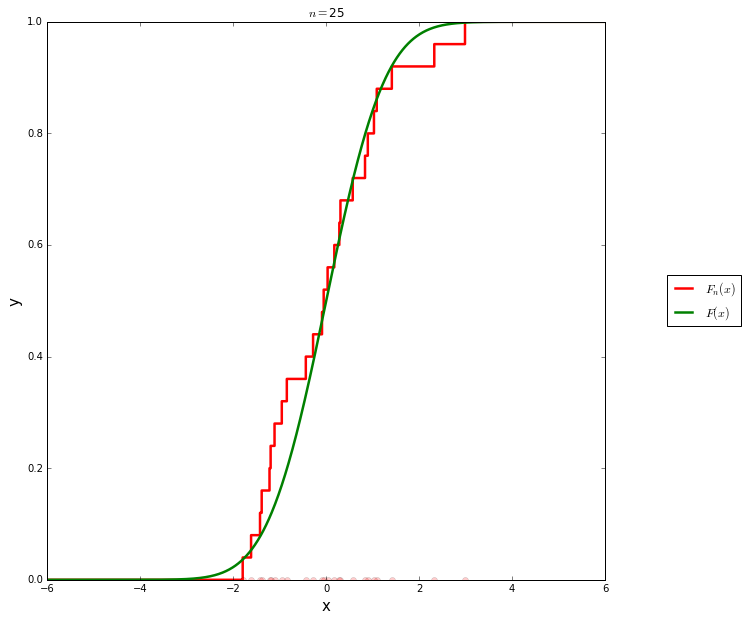

In [23]:
build_empirical_plot(25,sample)

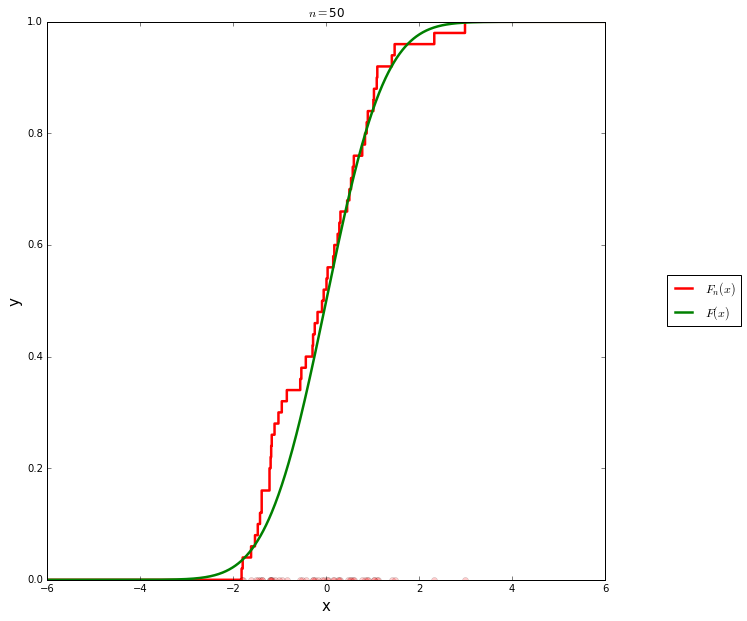

In [25]:
build_empirical_plot(50,sample)

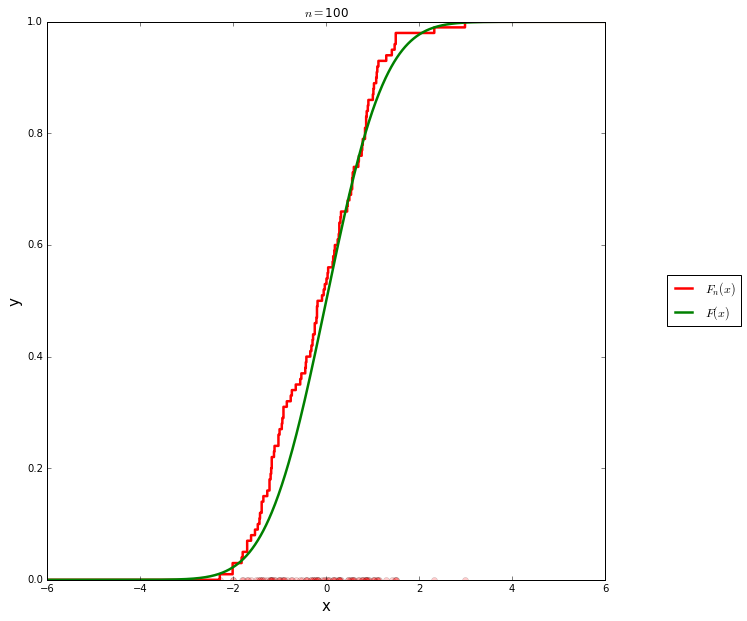

In [26]:
build_empirical_plot(100,sample)

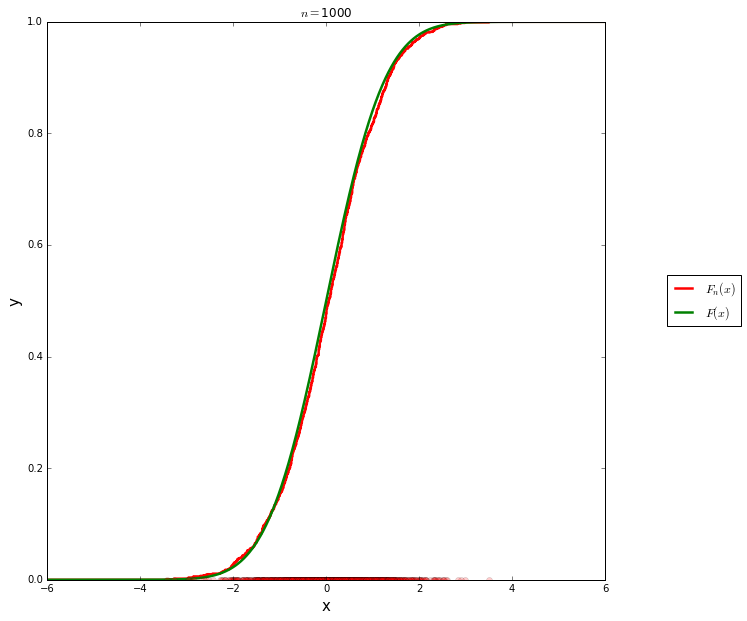

In [27]:
build_empirical_plot(1000,sample)

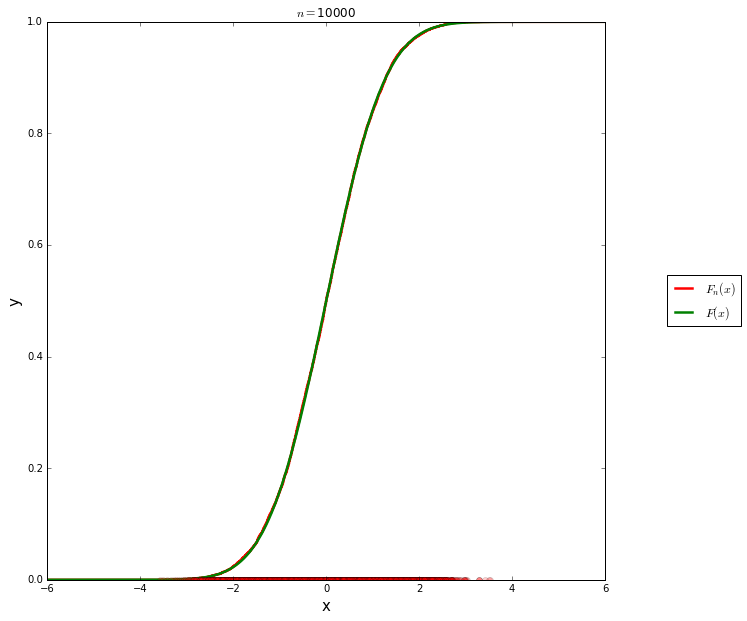

In [28]:
build_empirical_plot(10**4,sample)

## Посчитаем точное значение 𝐷𝑛 = sup|𝐹𝑛(𝑥) − 𝐹(𝑥)| 

In [13]:
def build_Dn(m, sample):
    x= np.arange(1, N+1, 1)
    y3 = numpy.zeros(m)
    for j in range(m):
        new_sample = np.array(sample[:j+1])
        new_sample.sort(0)
        #max может достигаться только на концах отрезка
        y1 = np.arange(0, j+1, 1)/float(j+1) #нижний предел
        y2 = y1 + 1./(j+1) #верхний предел
        y3[j] =  max(np.abs(sps.norm.cdf(new_sample, 0, 1) - y1).max(0),
                     np.abs(sps.norm.cdf(new_sample, 0, 1) - y2).max(0)) 
    plt.plot(x, y3, color = 'red', label = '$\sup_{x\in R}{|F_n(x) - F(x)|}$')
    plt.ylim((0, 0.3))
    plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
    plt.title(r'$D_n$',fontsize = 15)
    plt.xlabel('N', fontsize = 15)
    plt.ylabel(r'$D_n$', fontsize = 15)
    plt.show()

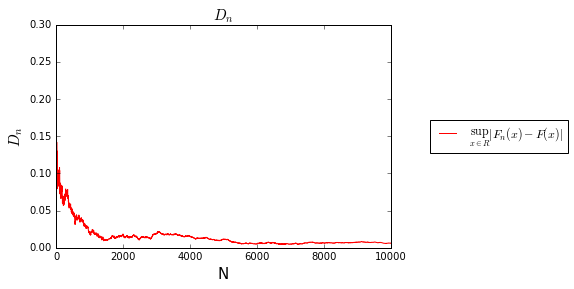

In [14]:
build_Dn(N, sample)